___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Кластеризация К-Средних - K-Means Clustering


Рассмотрим кластеризацию данных - это пример обучения без учителя (unsupervised learning).

## Цель:

Работая с методами обучения без учителя (unsupervised learning), очень важно уделить время на постановку задачи. В нашем примере мы постараемся объединить в кластеры клиентов некоторого банка, для маркетинговых целей. Такое объединение в кластеры **очень сильно** зависит от предметной области, в нашем случае это маркетинг в банковской сфере.

----

## Данные

Источник: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   Детали можно почитать здесь: [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Ссылки: [pdf] http://hdl.handle.net/1822/14838
              [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     

    # Данные о клиентах банка:
    1 - age - возраст(numeric)
    2 - job : категория работы (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : семейный статус (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education - образование (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: были ли просрочки по кредиту? (categorical: 'no','yes','unknown')
    6 - housing: есть ли кредит на жильё? (categorical: 'no','yes','unknown')
    7 - loan: есть ли потребительский кредит? (categorical: 'no','yes','unknown')
    # информация о последней коммуникации банка с клиентом в текущей маркетинговой кампании:
    8 - contact: тип коммуникации (categorical: 'cellular','telephone')
    9 - month: месяц года, когда была последняя коммуникация (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: день недели, когда была последняя коммуникация (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: длительность последней коммуникации, в секундах (numeric). Важное замечание: этот атрибут очень сильно влияет на целевую переменную (например, если duration=0, то y='no'). Однако, эта длительность неизвестна до момента совершения телефонного звонка. А после звонка значение y уже становится явно известным. Поэтому данный атрибут следует рассматривать только для анализа данных, и его следует исключить из рассмотрения, когда мы создаём предиктивную модель.
    # другие атрибуты:
    12 - campaign: сколько раз банк контактировал с клиентом во время текущей маркетинговой кампании, включая последнюю коммуникацию (numeric)
    13 - pdays: количество дней, прошедшее с момента последней коммуникации с клиентом во время предыдущей маркетинговой кампании (numeric; 999 означает, что предыдущих коммуникаций не было)
    14 - previous: сколько раз банк контактировал с клиентом по время предыдущих маркетинговых кампаний (numeric)
    15 - poutcome: результат предыдущих маркетинговых кампаний (categorical: 'failure','nonexistent','success')
    # социальные и экономические атрибуты
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Исследование данных (EDA - Exploratory Data Analysis)

In [3]:
df = pd.read_csv("bank-full.csv")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Анализ непрерывных признаков

<Axes: xlabel='age', ylabel='Count'>

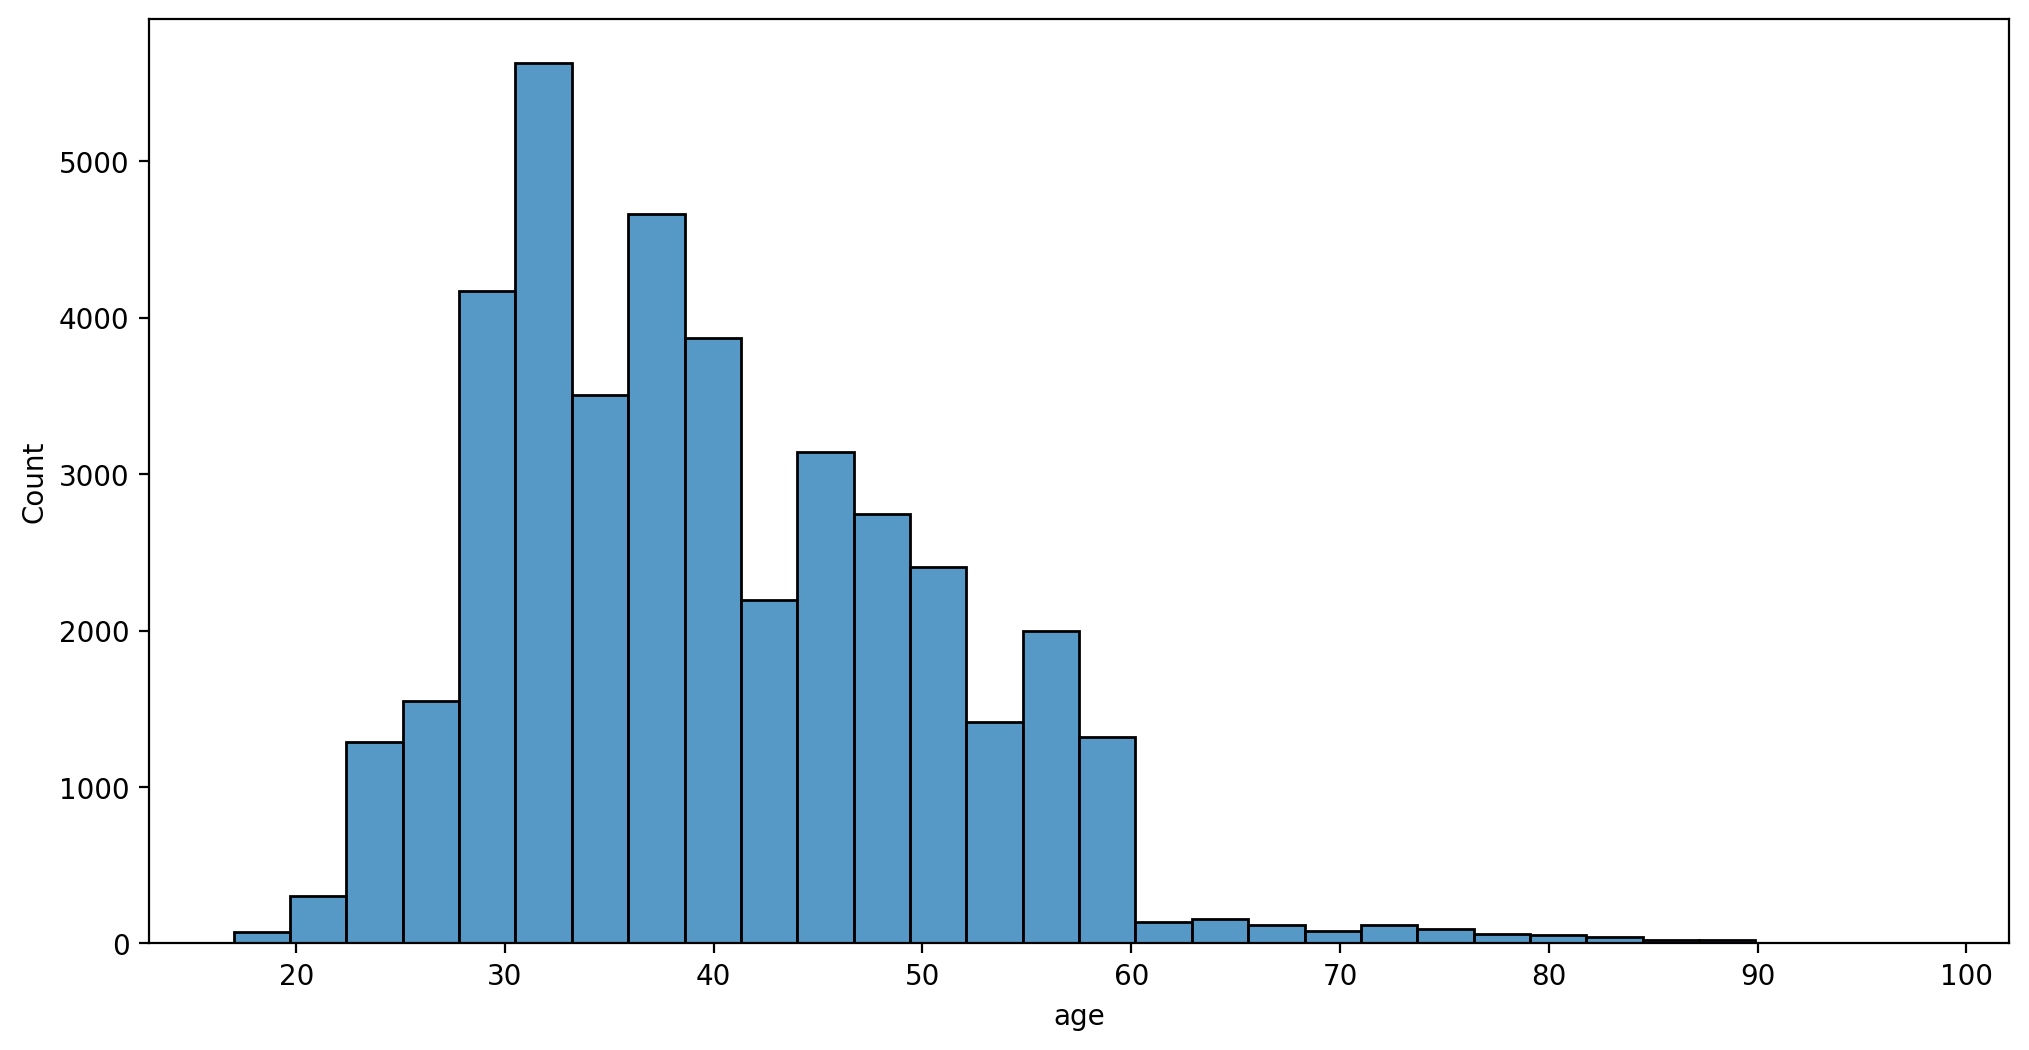

In [7]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age', bins=30)

<Axes: xlabel='age', ylabel='Count'>

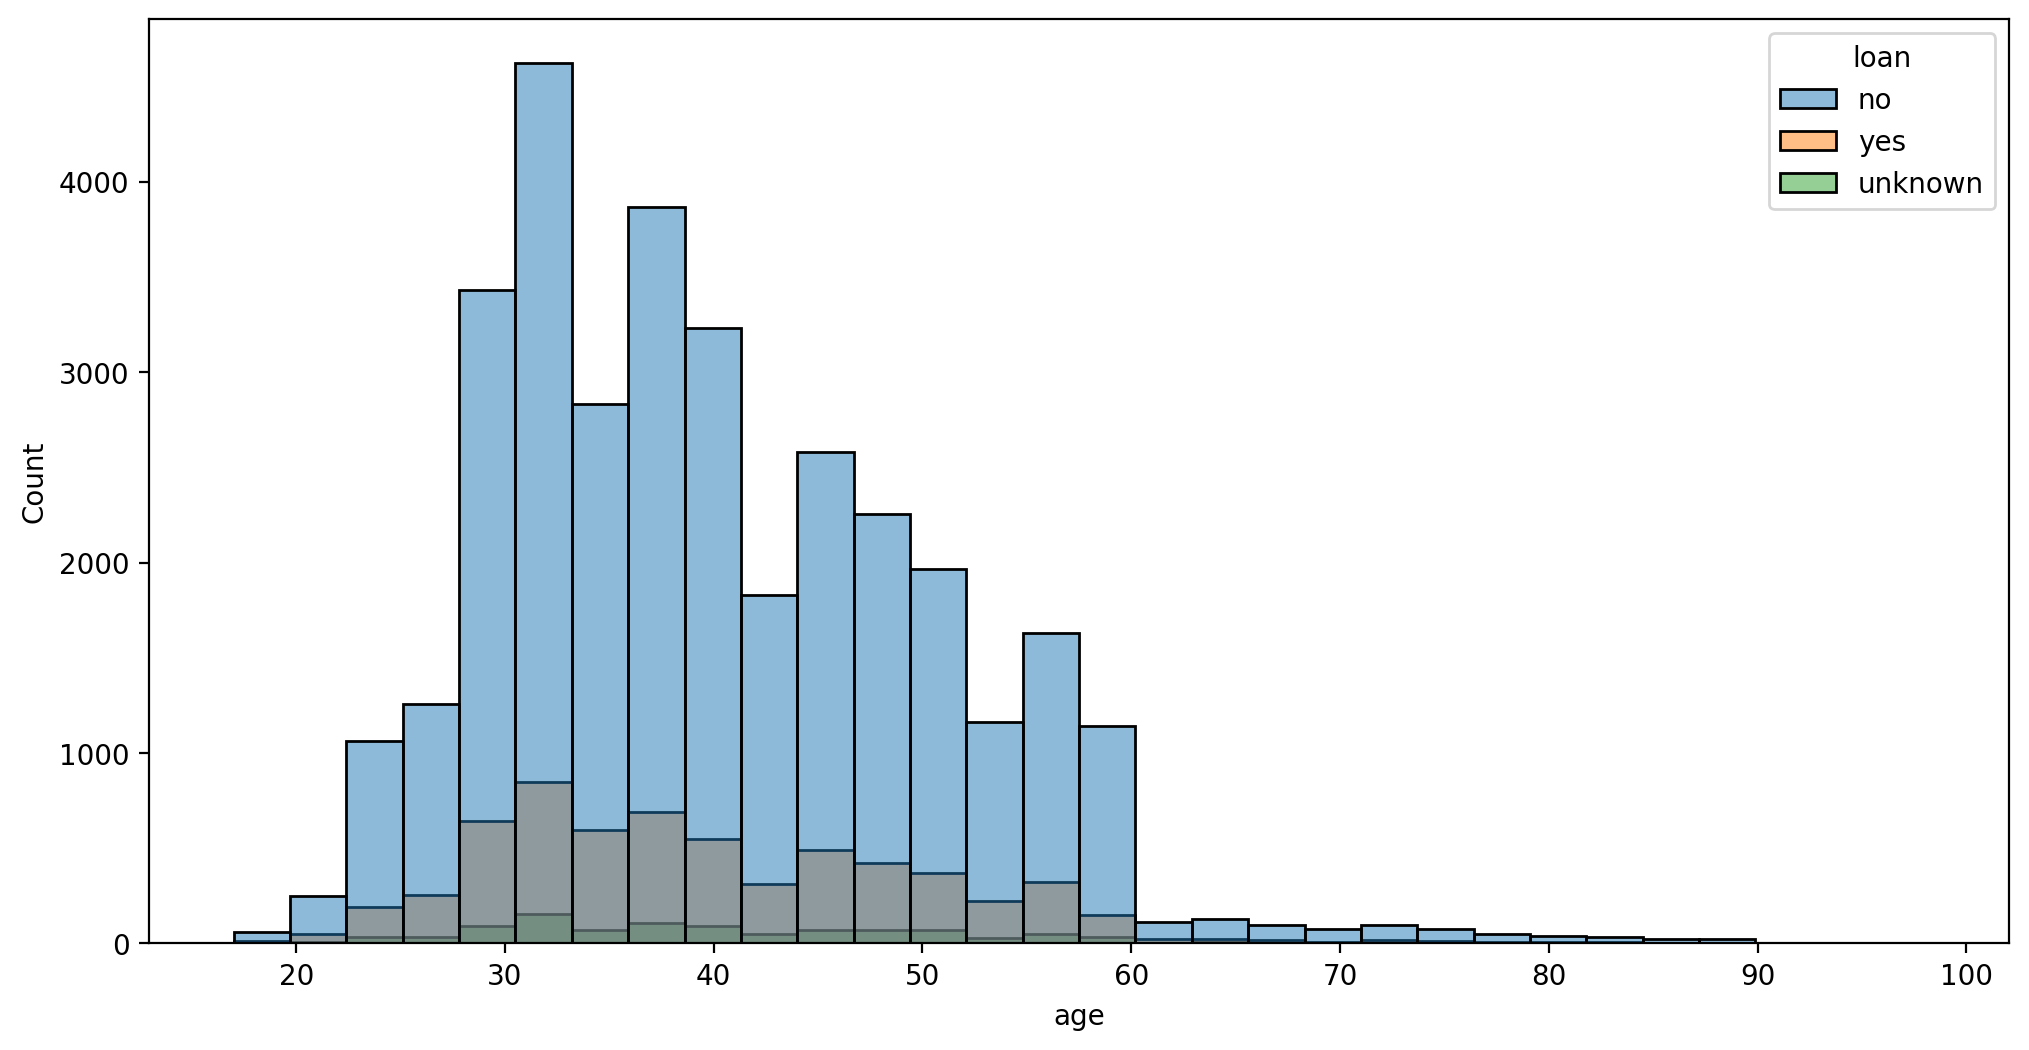

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=30, hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

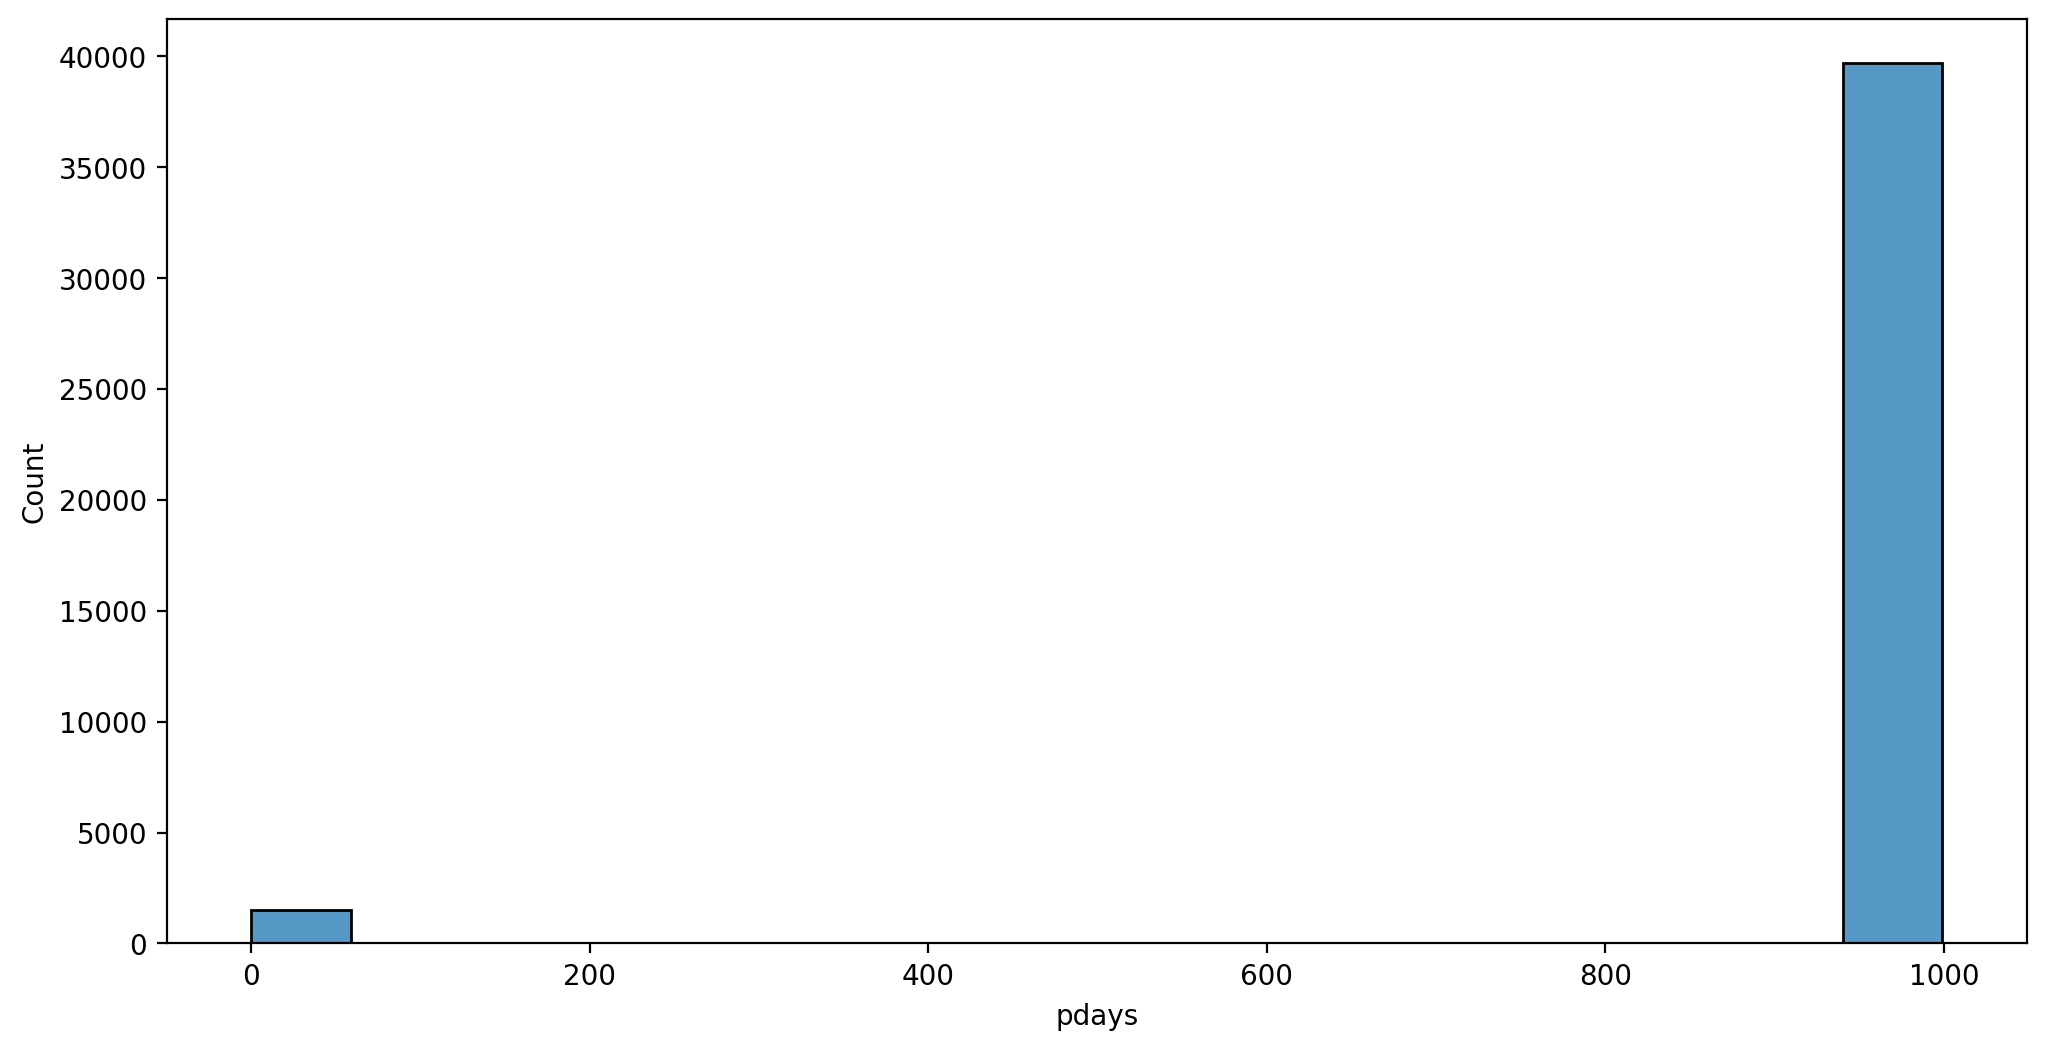

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

<Axes: xlabel='pdays', ylabel='Count'>

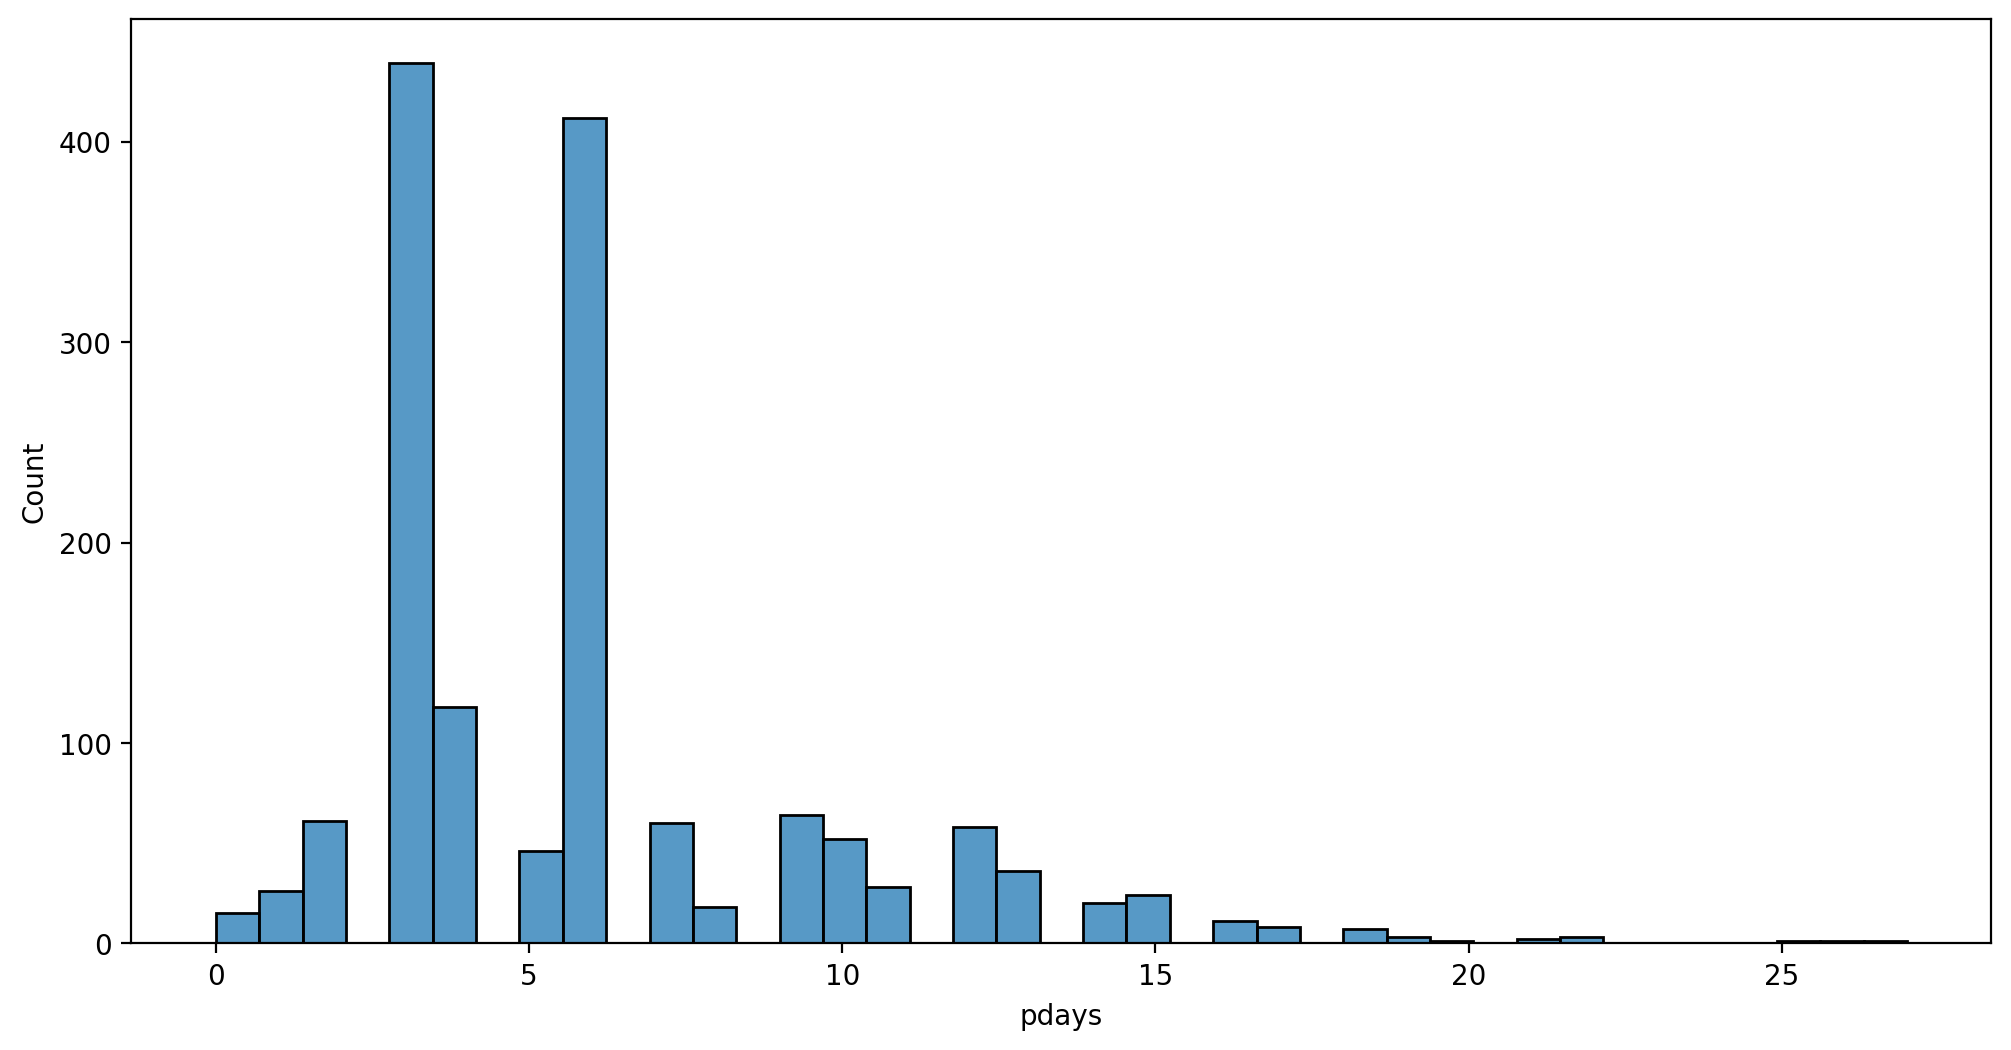

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

**Contact duration - сколько длился телефонный звонок с клиентом?**

(0.0, 2000.0)

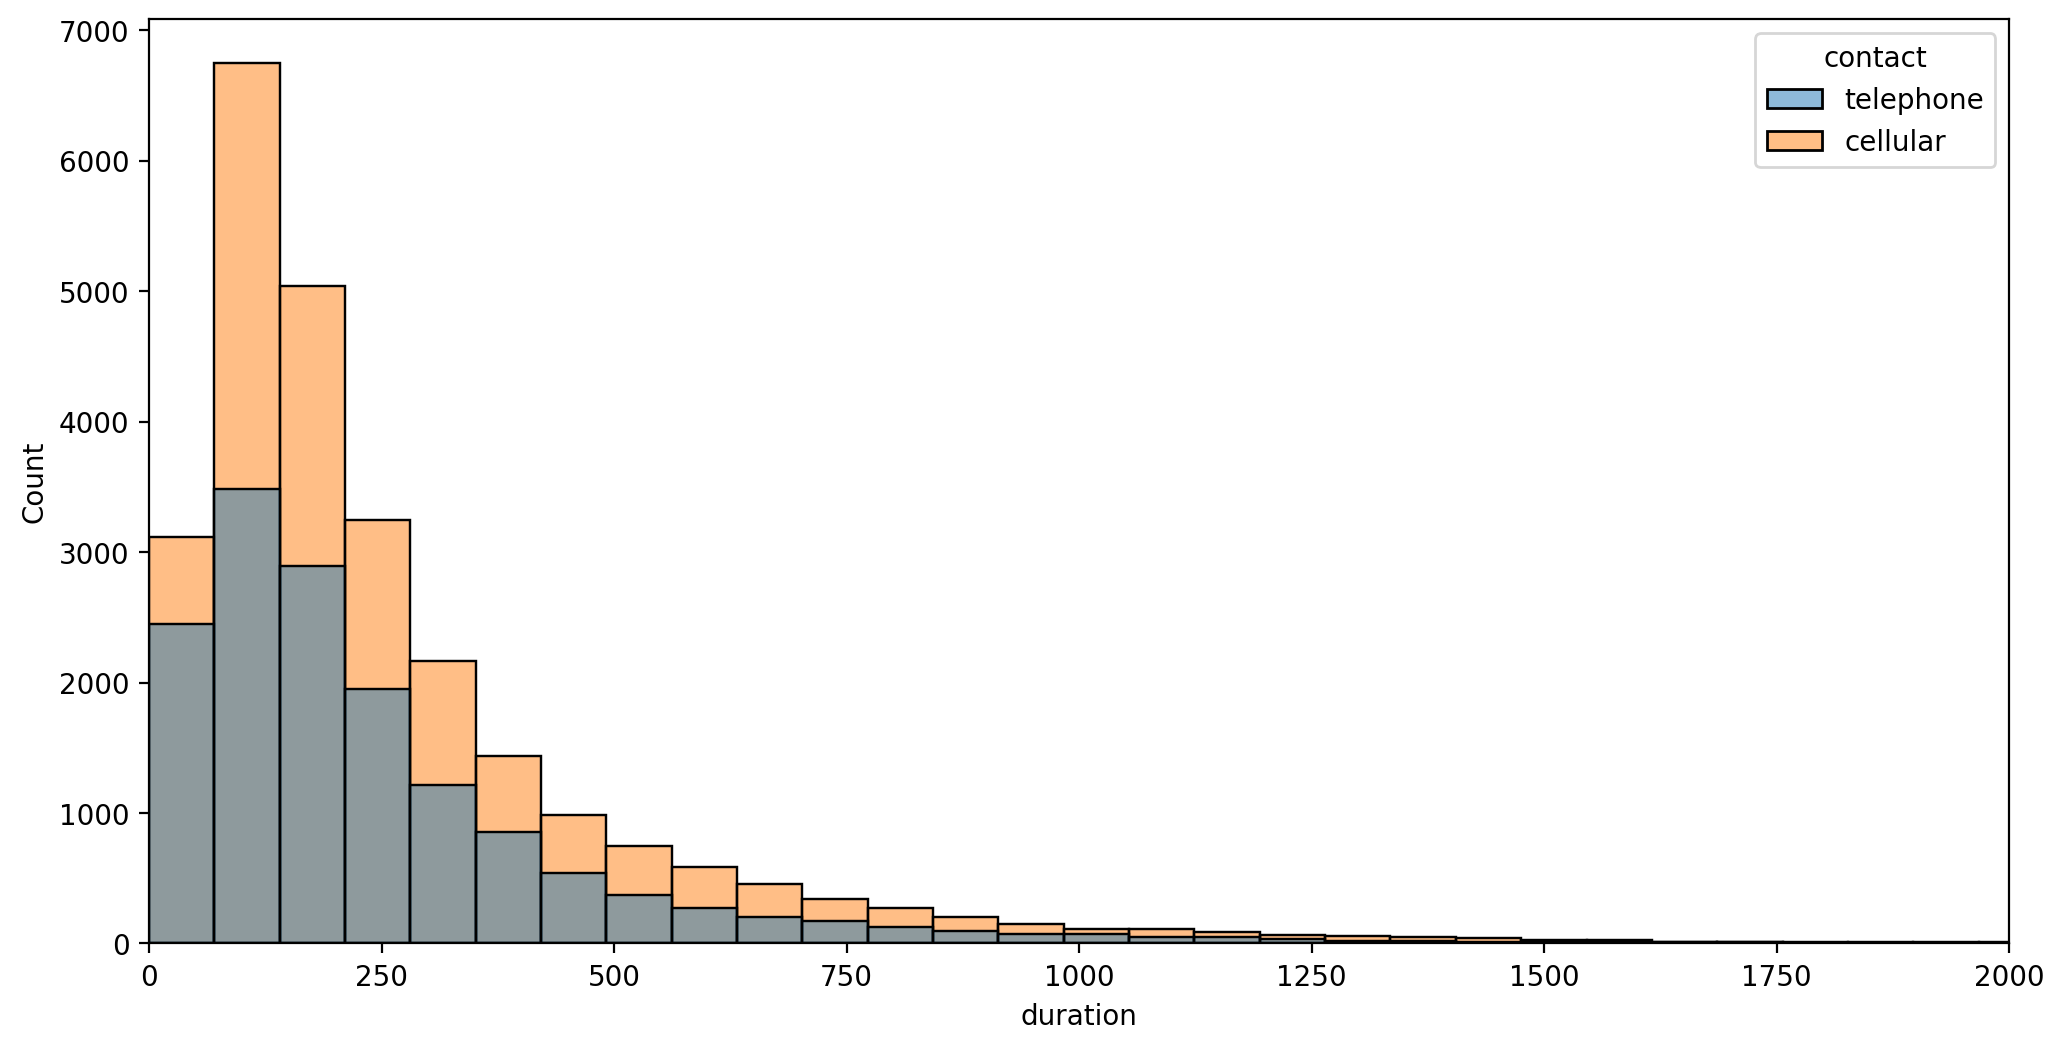

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact', bins=70)
plt.xlim(0,2000)

* 14 - previous: сколько раз банк контактировал с клиентом по время предыдущих маркетинговых кампаний (numeric)
* 15 - poutcome: результат предыдущих маркетинговых кампаний (categorical: 'failure','nonexistent','success')

<Axes: xlabel='previous', ylabel='count'>

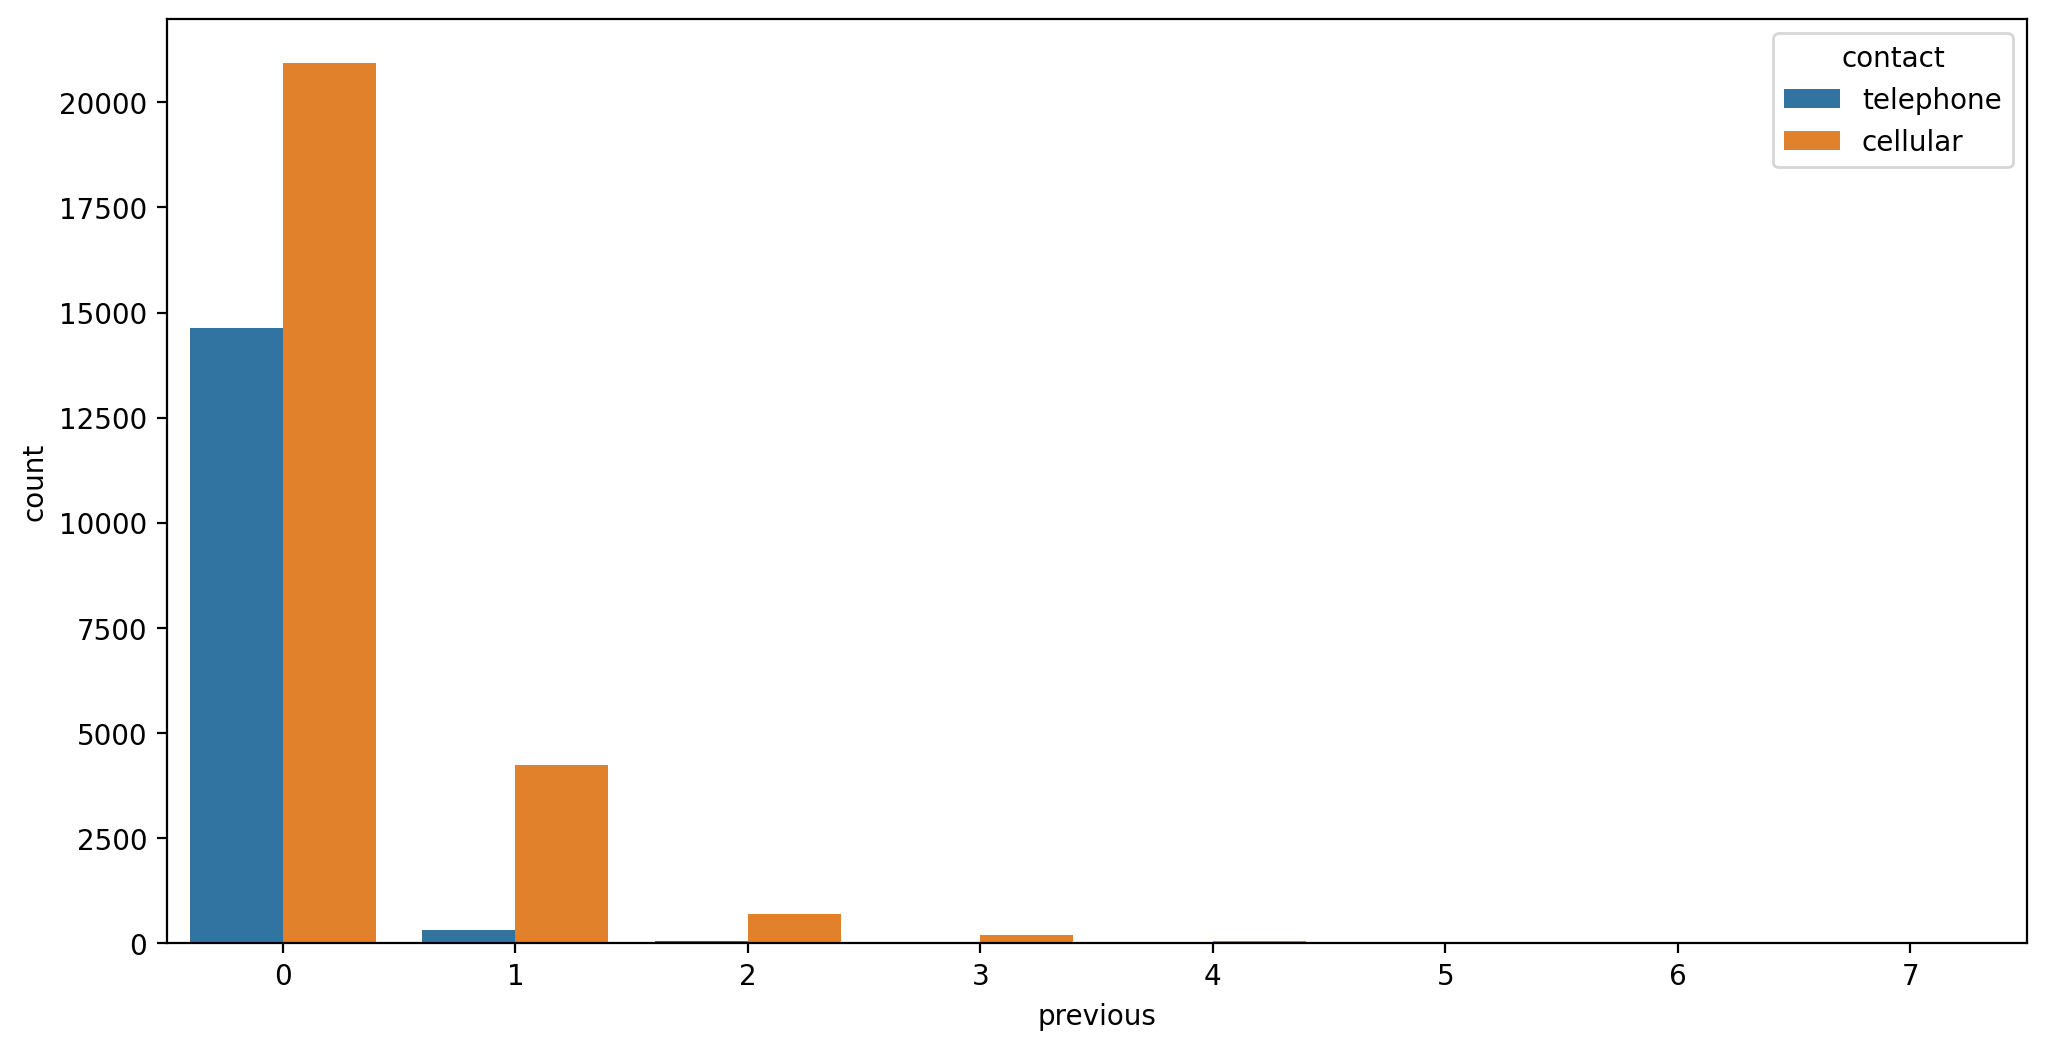

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

<Axes: xlabel='contact', ylabel='count'>

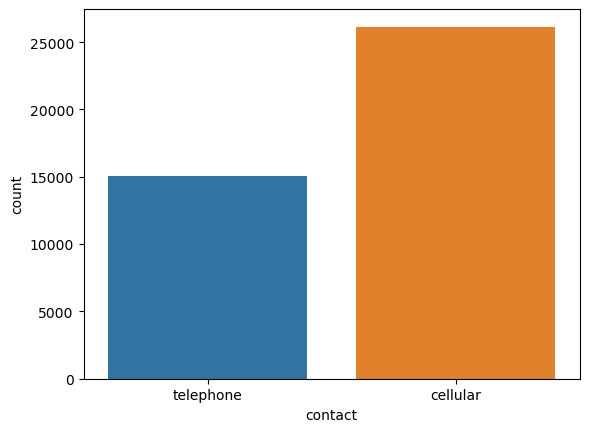

In [13]:
sns.countplot(data=df,x='contact')

In [14]:
# df['previous'].value_counts()
df['previous'].value_counts().sum()-36954
# 36954 vs. 8257

4234

## Категорийные (категориальные) признаки

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


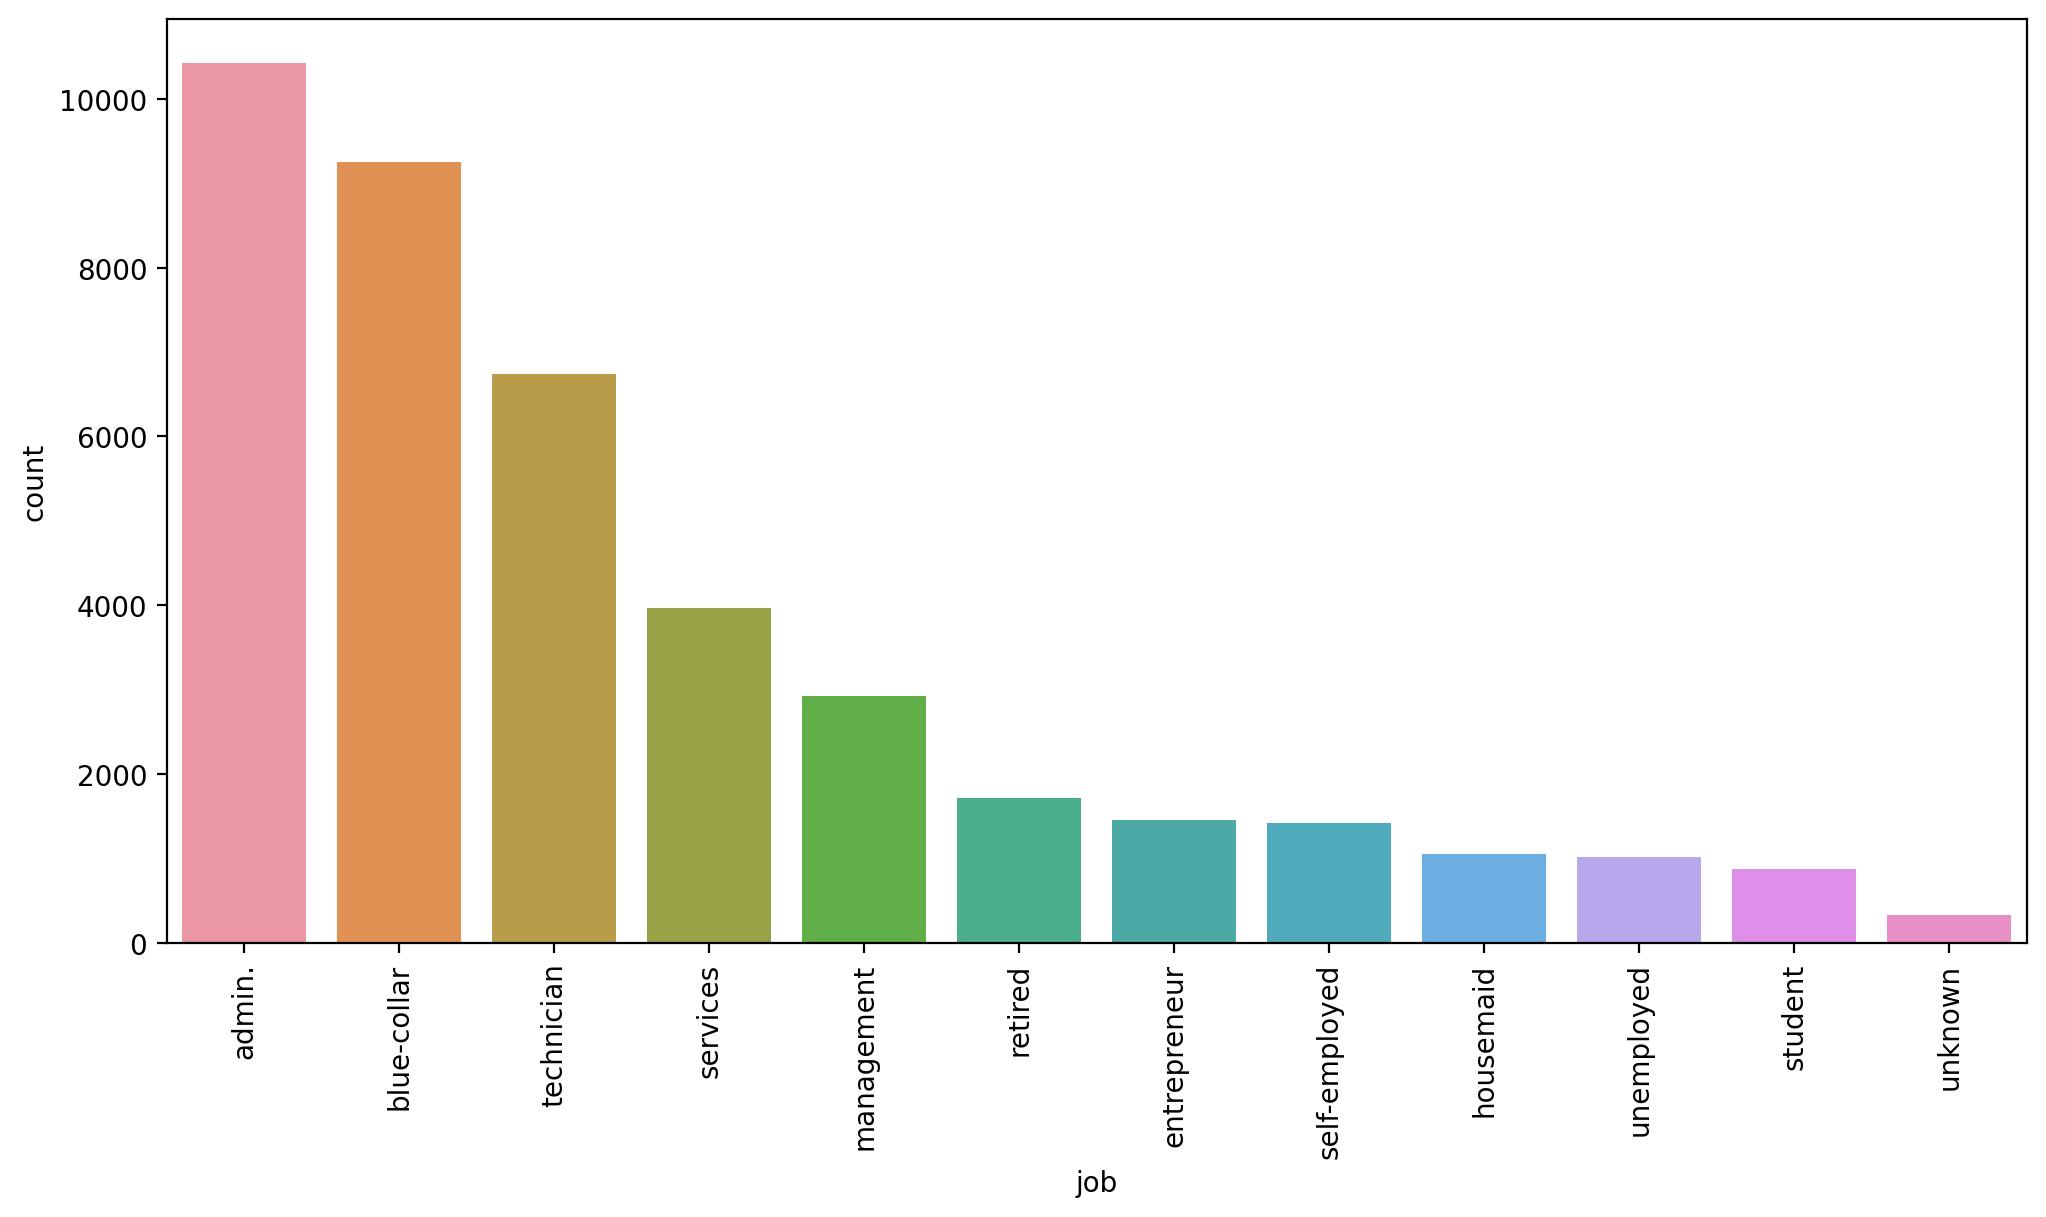

In [16]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

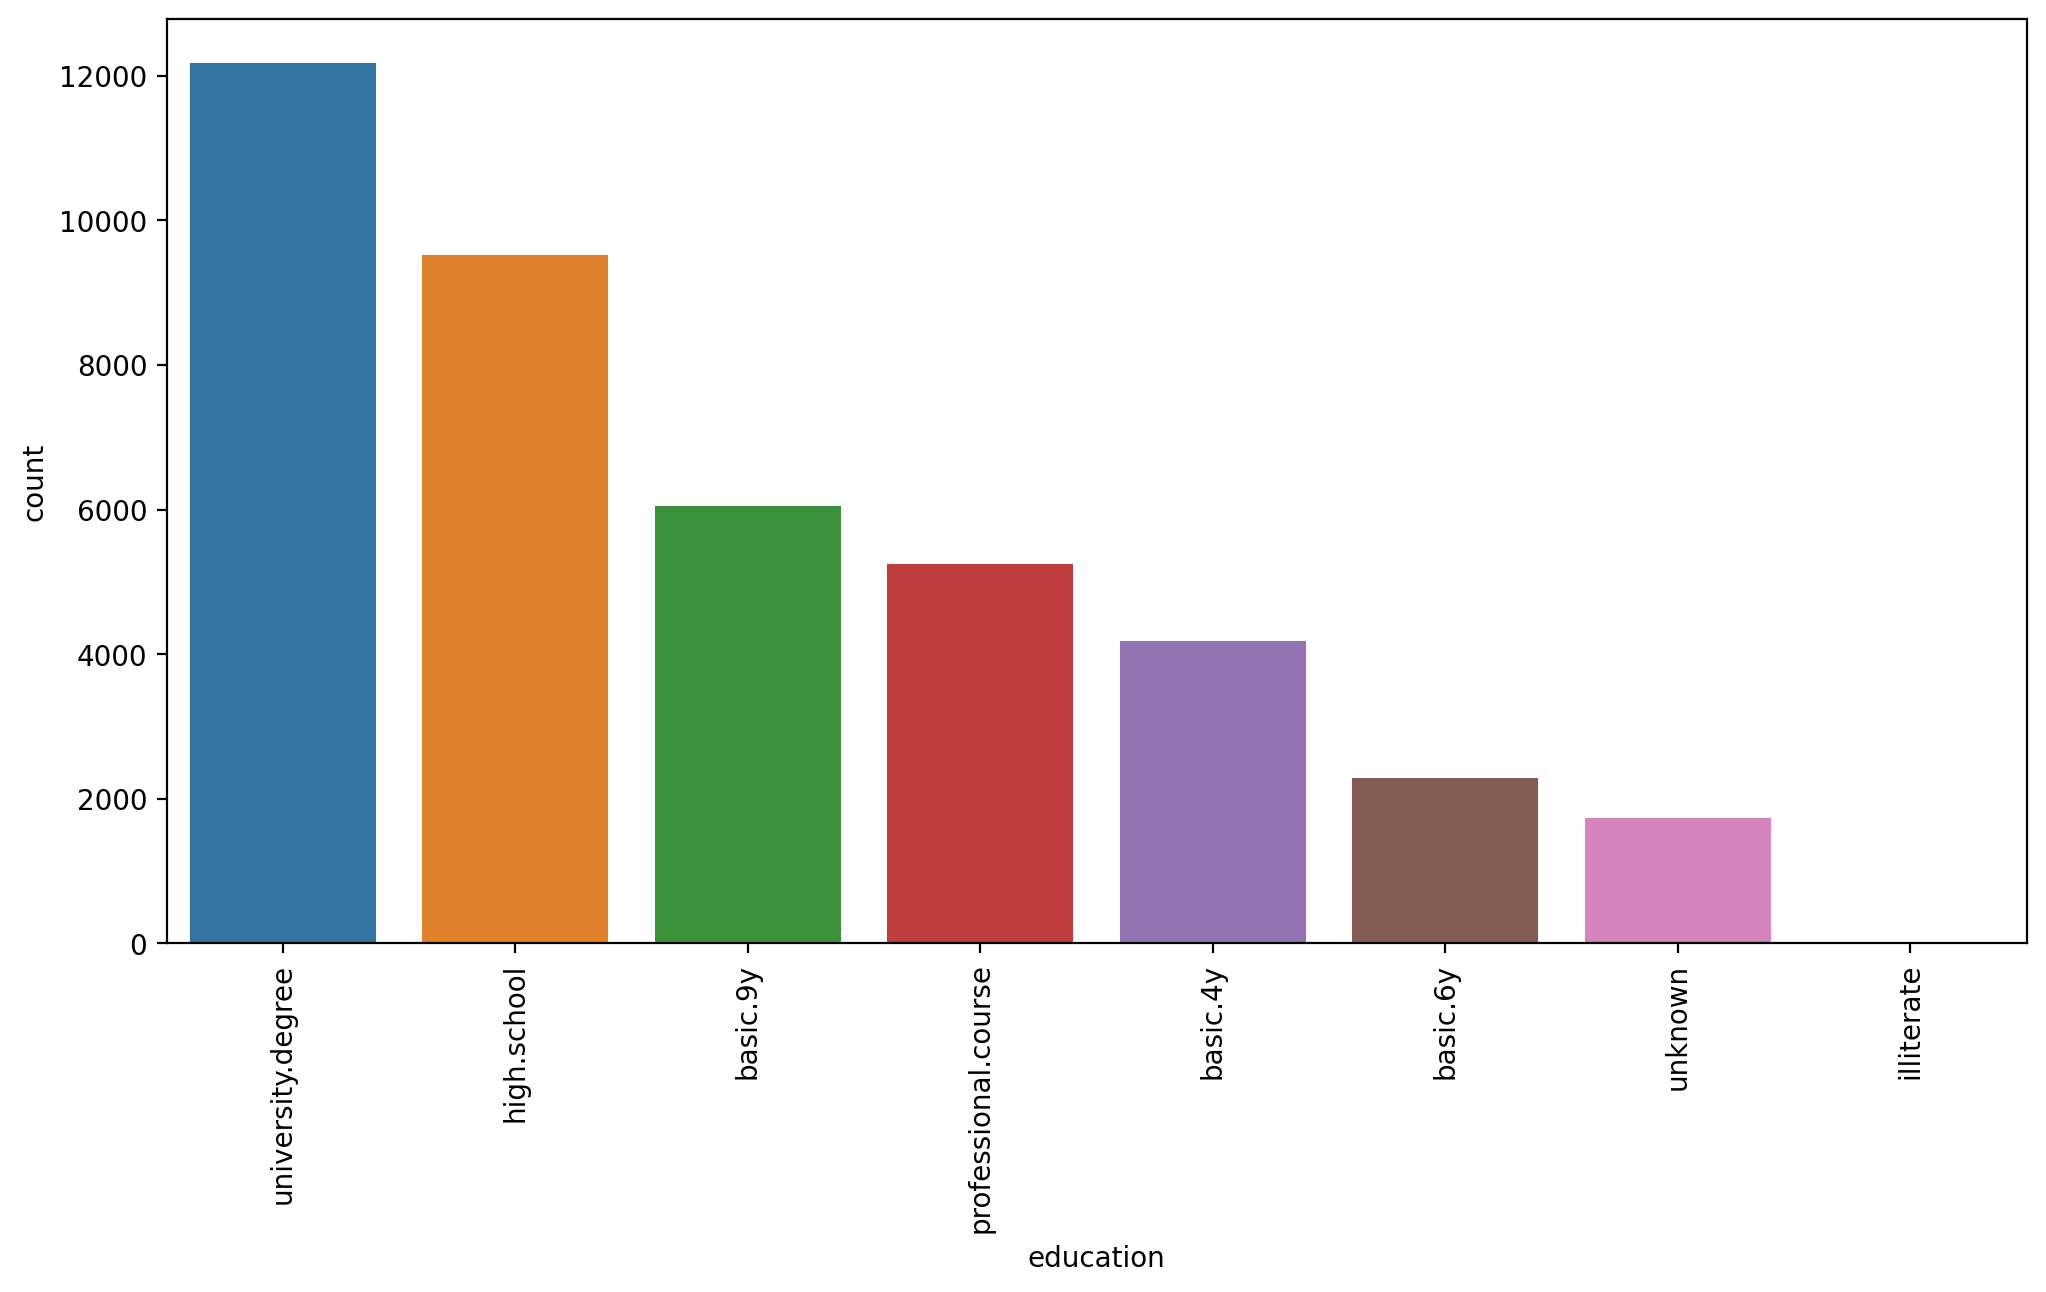

In [17]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

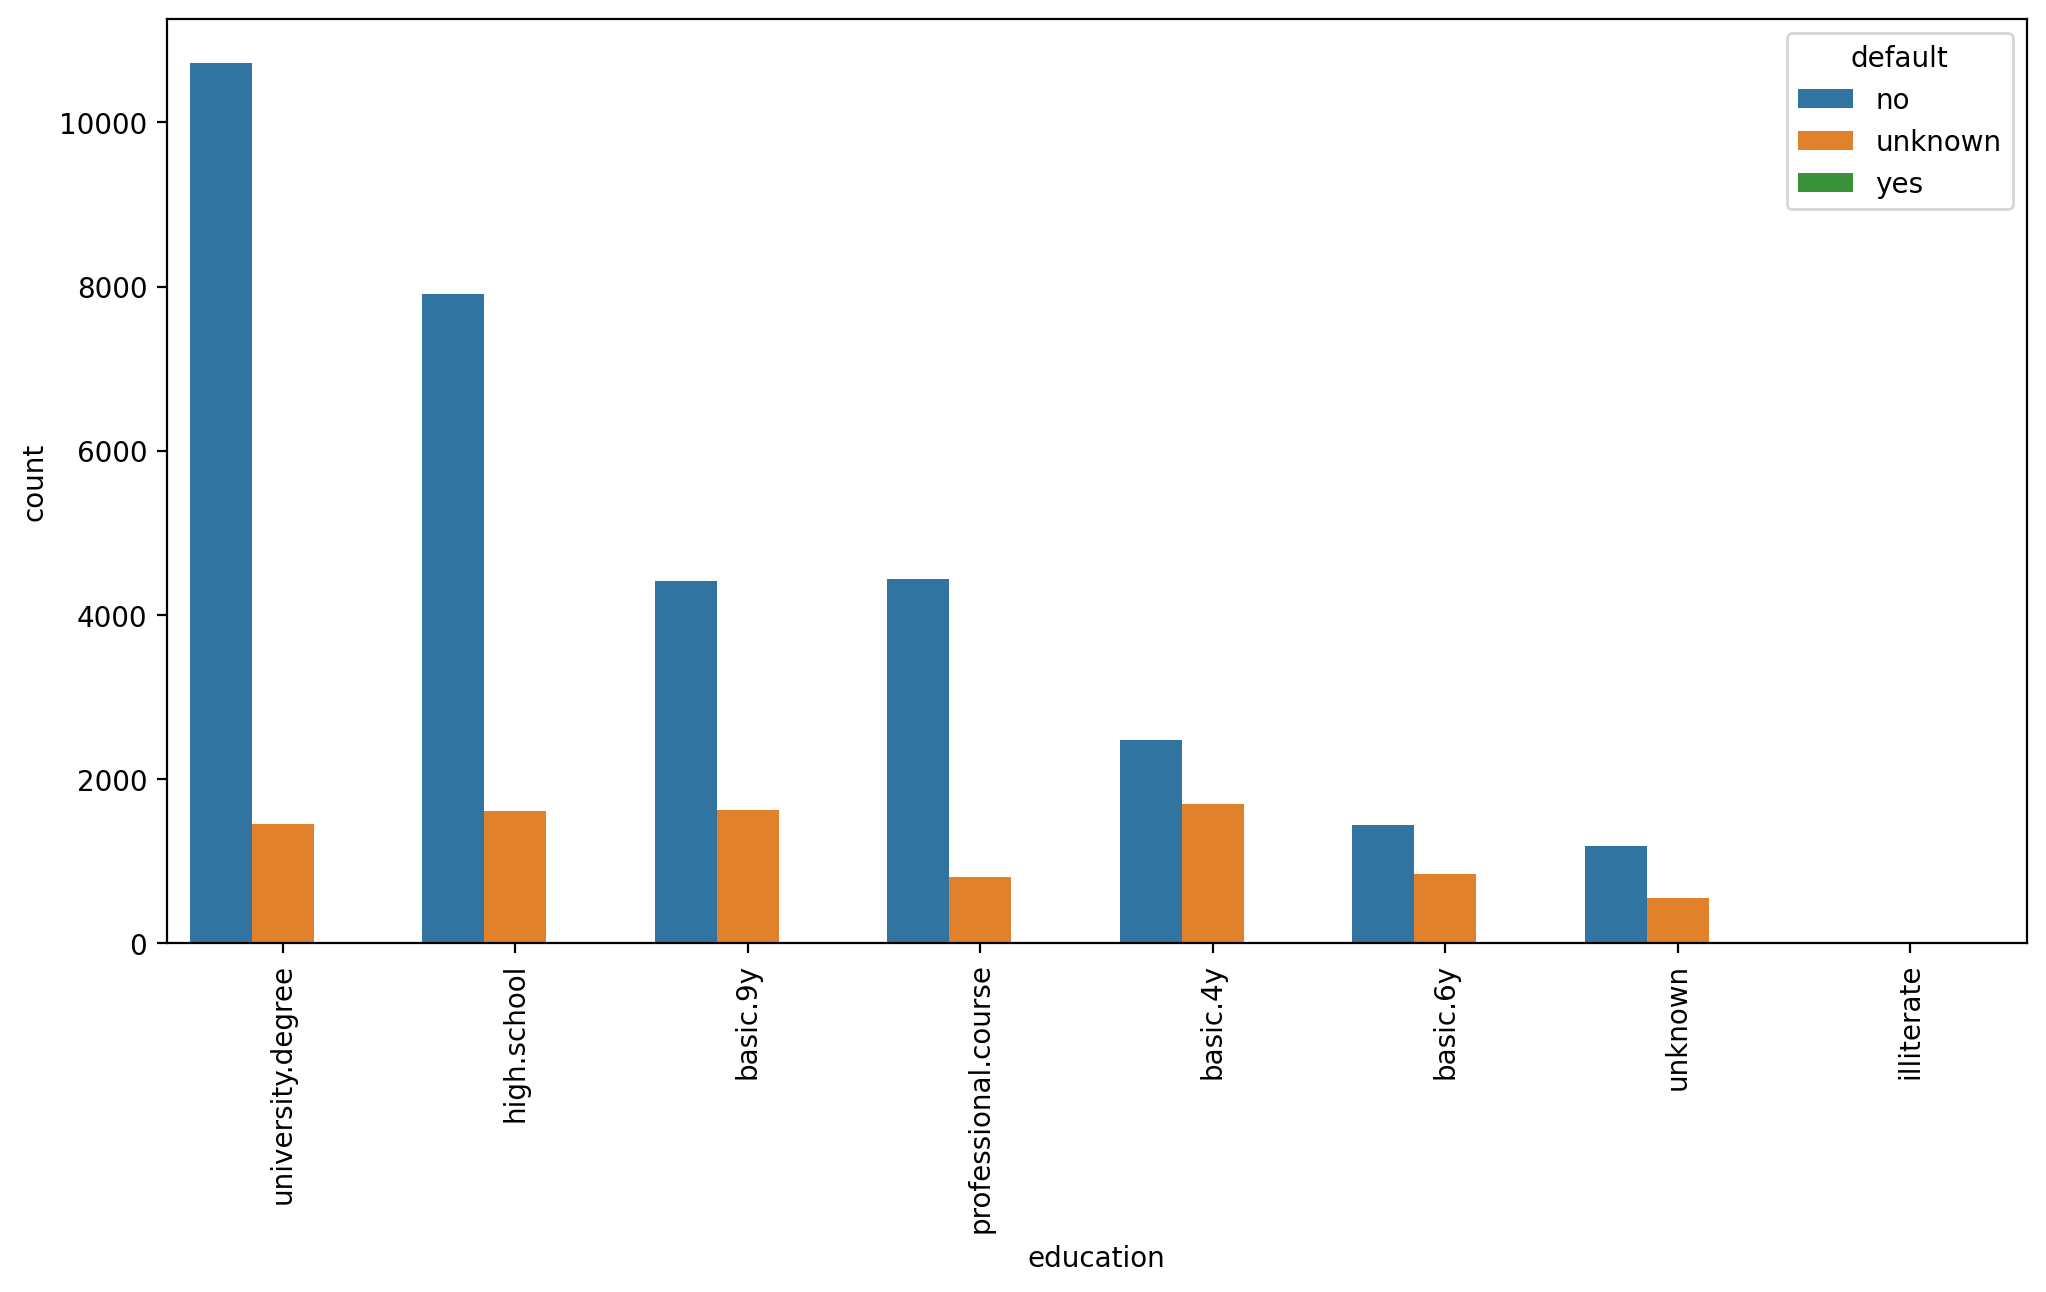

In [18]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

<Axes: xlabel='default', ylabel='count'>

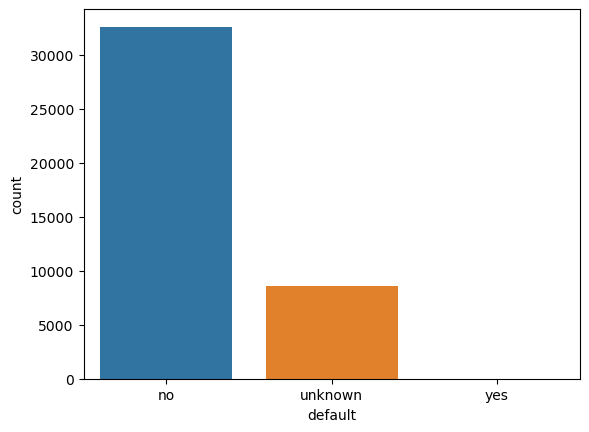

In [19]:
sns.countplot(data=df,x='default')

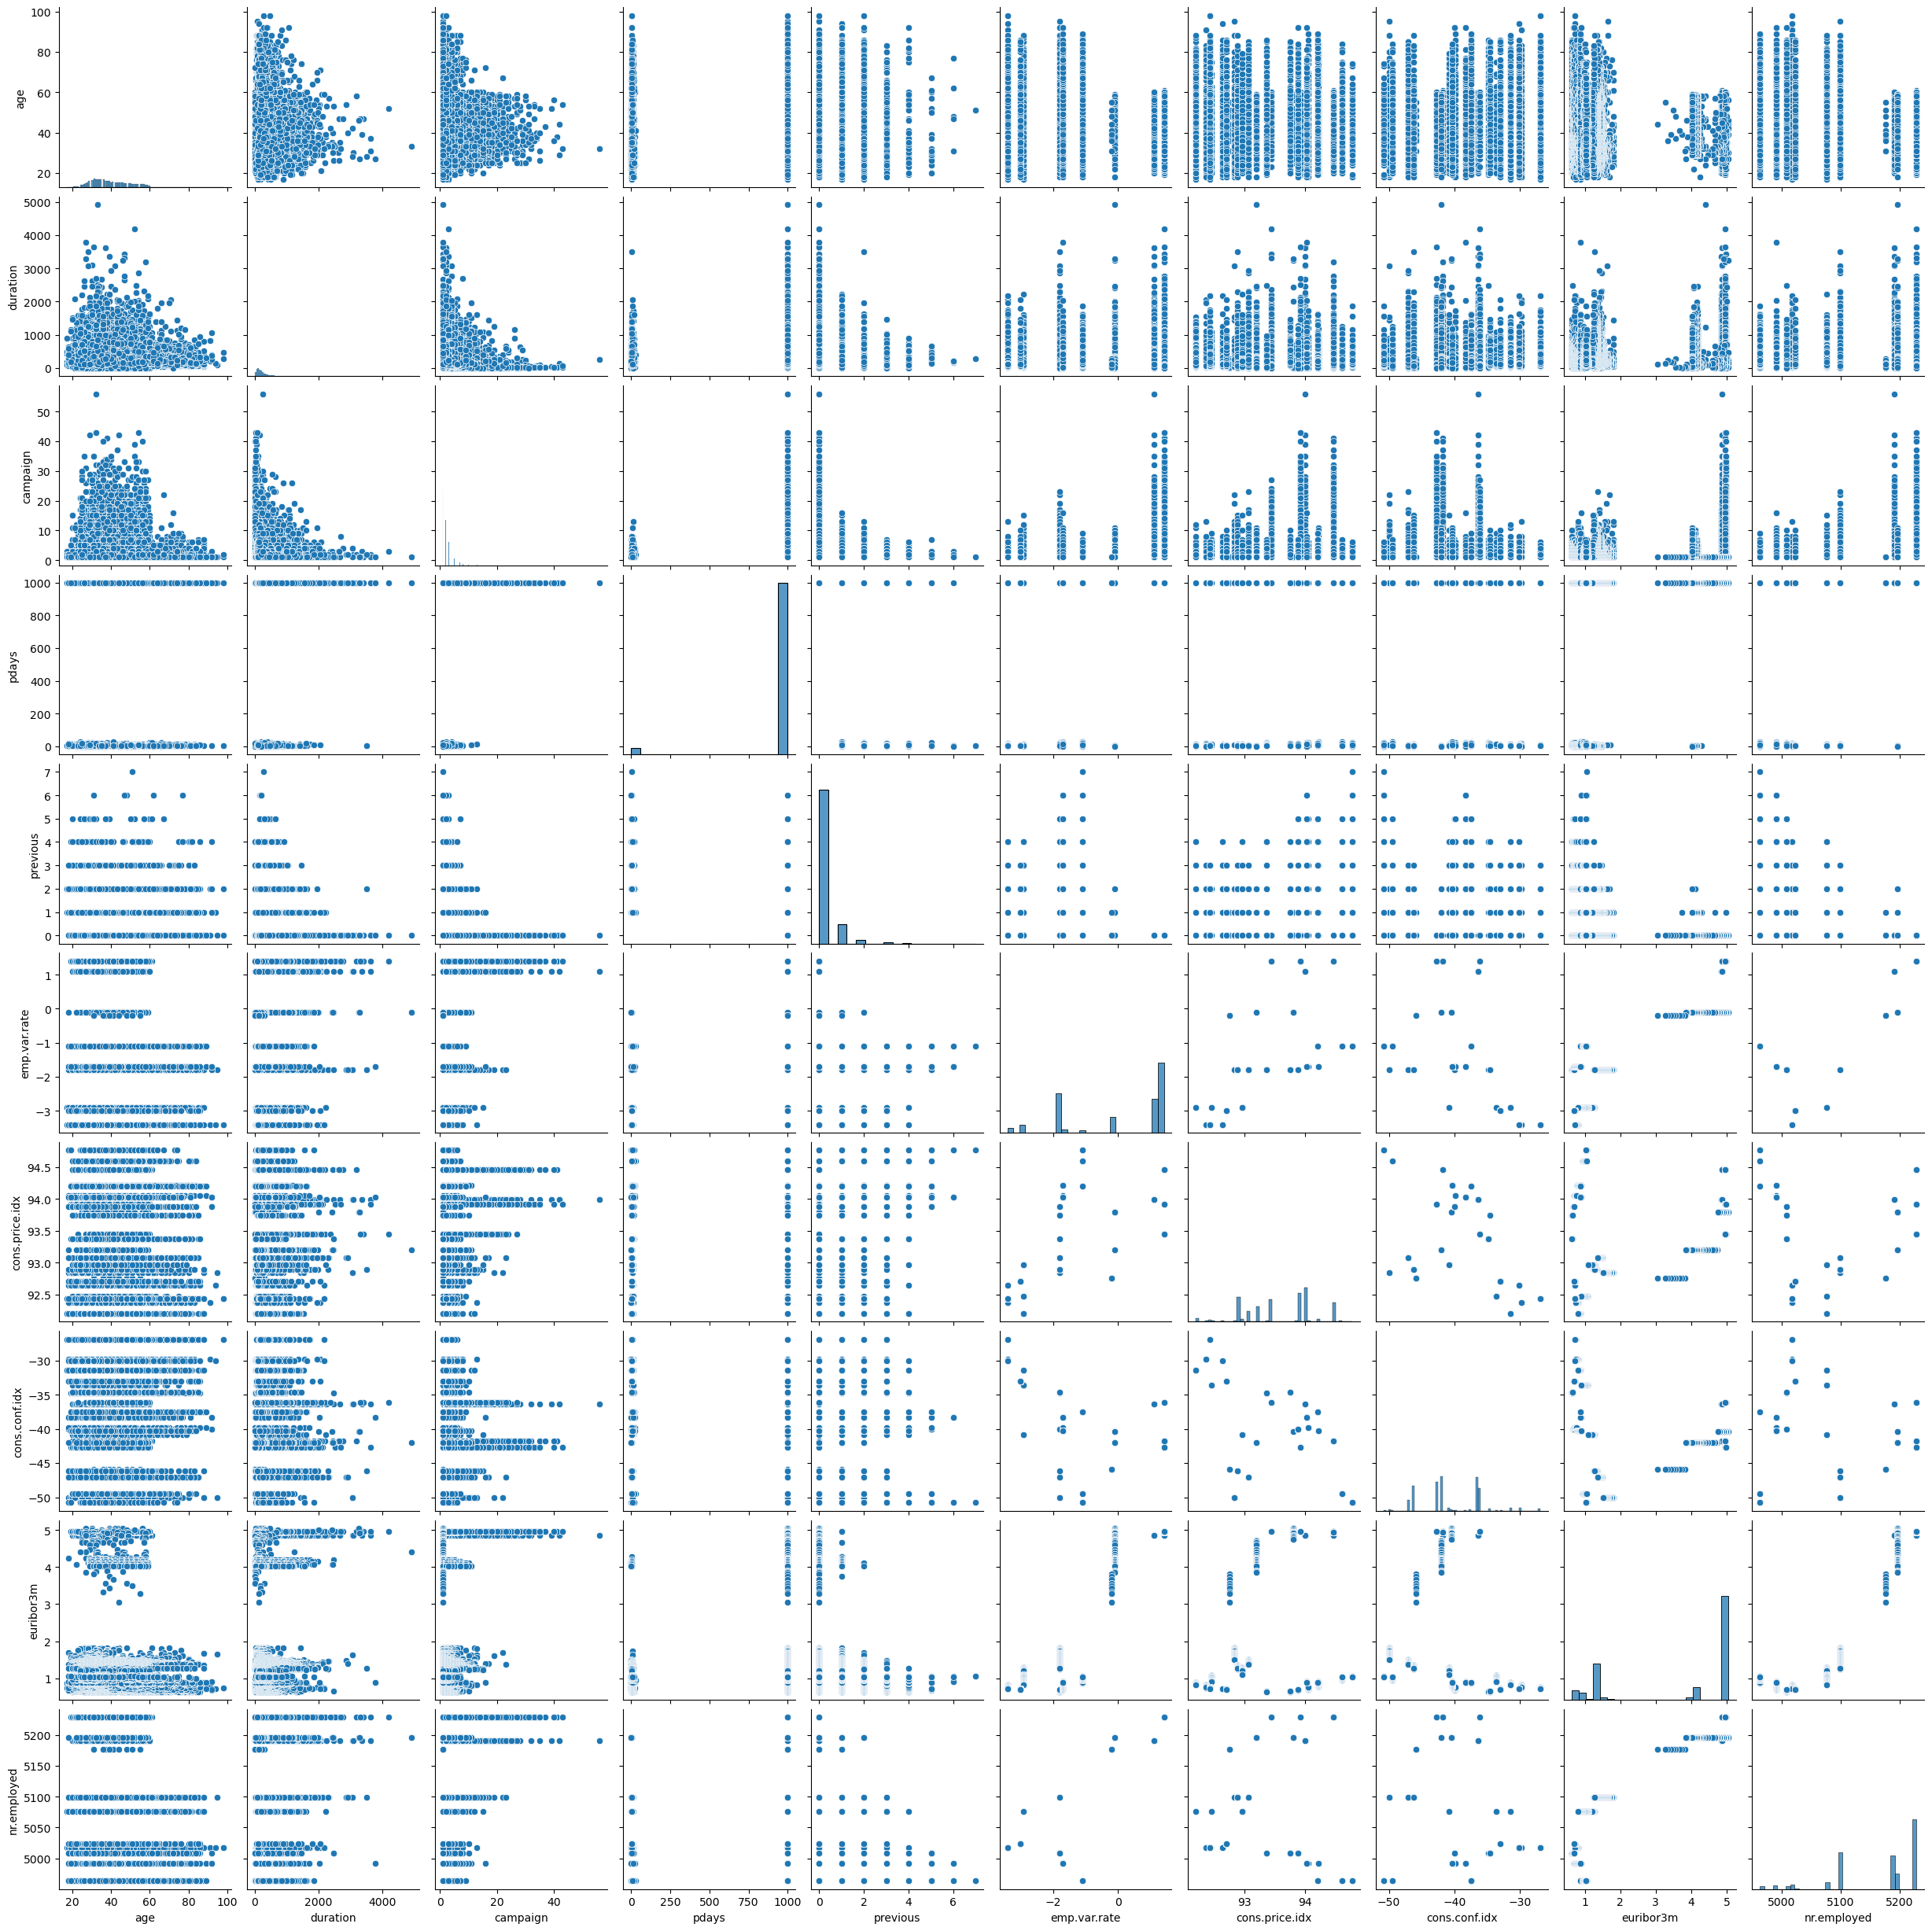

In [20]:
# Это может занять длительное время!
sns.pairplot(df)

## Кластеризация данных

### Подготовка данных

**Напоминание по поводу алгоритмов обучения без учителя (unsupervised learning): не нужно выполнять разбиение на обучающий и тестовый наборы данных! Потому что нет целевой переменной, для сравнения с которой пригодился бы тестовый набор данных!**

Однако нам по-прежнему нужно преобразовать категориальные признаки в числовые - там, где это имеет смысл. А также нужно выполнить масштабирование данных, потому что расстояние между точками является важной частью алгоритмов кластеризации.

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
X = pd.get_dummies(df)

In [23]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X = scaler.fit_transform(X)

In [28]:
scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

### Создание и обучение модели KMeans

У нас есть следующие методы:

* fit(X[, y, sample_weight])
    * Вычисление центров кластеров (выполнение кластеризации k-means).

* fit_predict(X[, y, sample_weight])
    * Вычисление центров кластеров и предсказание номеров кластеров для каждой точки.

* fit_transform(X[, y, sample_weight])
    * Вычисление центров кластеров и преобразование X в пространство cluster-distance.

* predict(X[, sample_weight])
    * Предсказание ближайшего кластера для каждой точки из данных X.

In [25]:
from sklearn.cluster import KMeans

In [28]:
model = KMeans(n_clusters=2)

In [ ]:
# cluster_labels = model.fit(scaled_X) - вычисляет кластеры

# cluster_labels = model.fit_transform(scaled_X) - fit +
# возвращает расстояния для точек от центров кластеров.

# cluster_labels = model.fit_predict(scaled_X) - fit + 
# возвращает значения кластеров.

# cluster_labels = model.predict(...) - вычисляет значение кластера.

cluster_labels = model.fit_predict(scaled_X)

c:\Users\shaps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# ВАЖНОЕ ЗАМЕЧАНИЕ: Ваши 0 и 1 могут быть противоположными,
# потому что сами номера кластеров не имеют особого смысла!
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
len(scaled_X)

41188

In [32]:
len(cluster_labels)

41188

In [33]:
X['Cluster'] = cluster_labels

In [35]:
X.corr()['Cluster']

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

<Axes: >

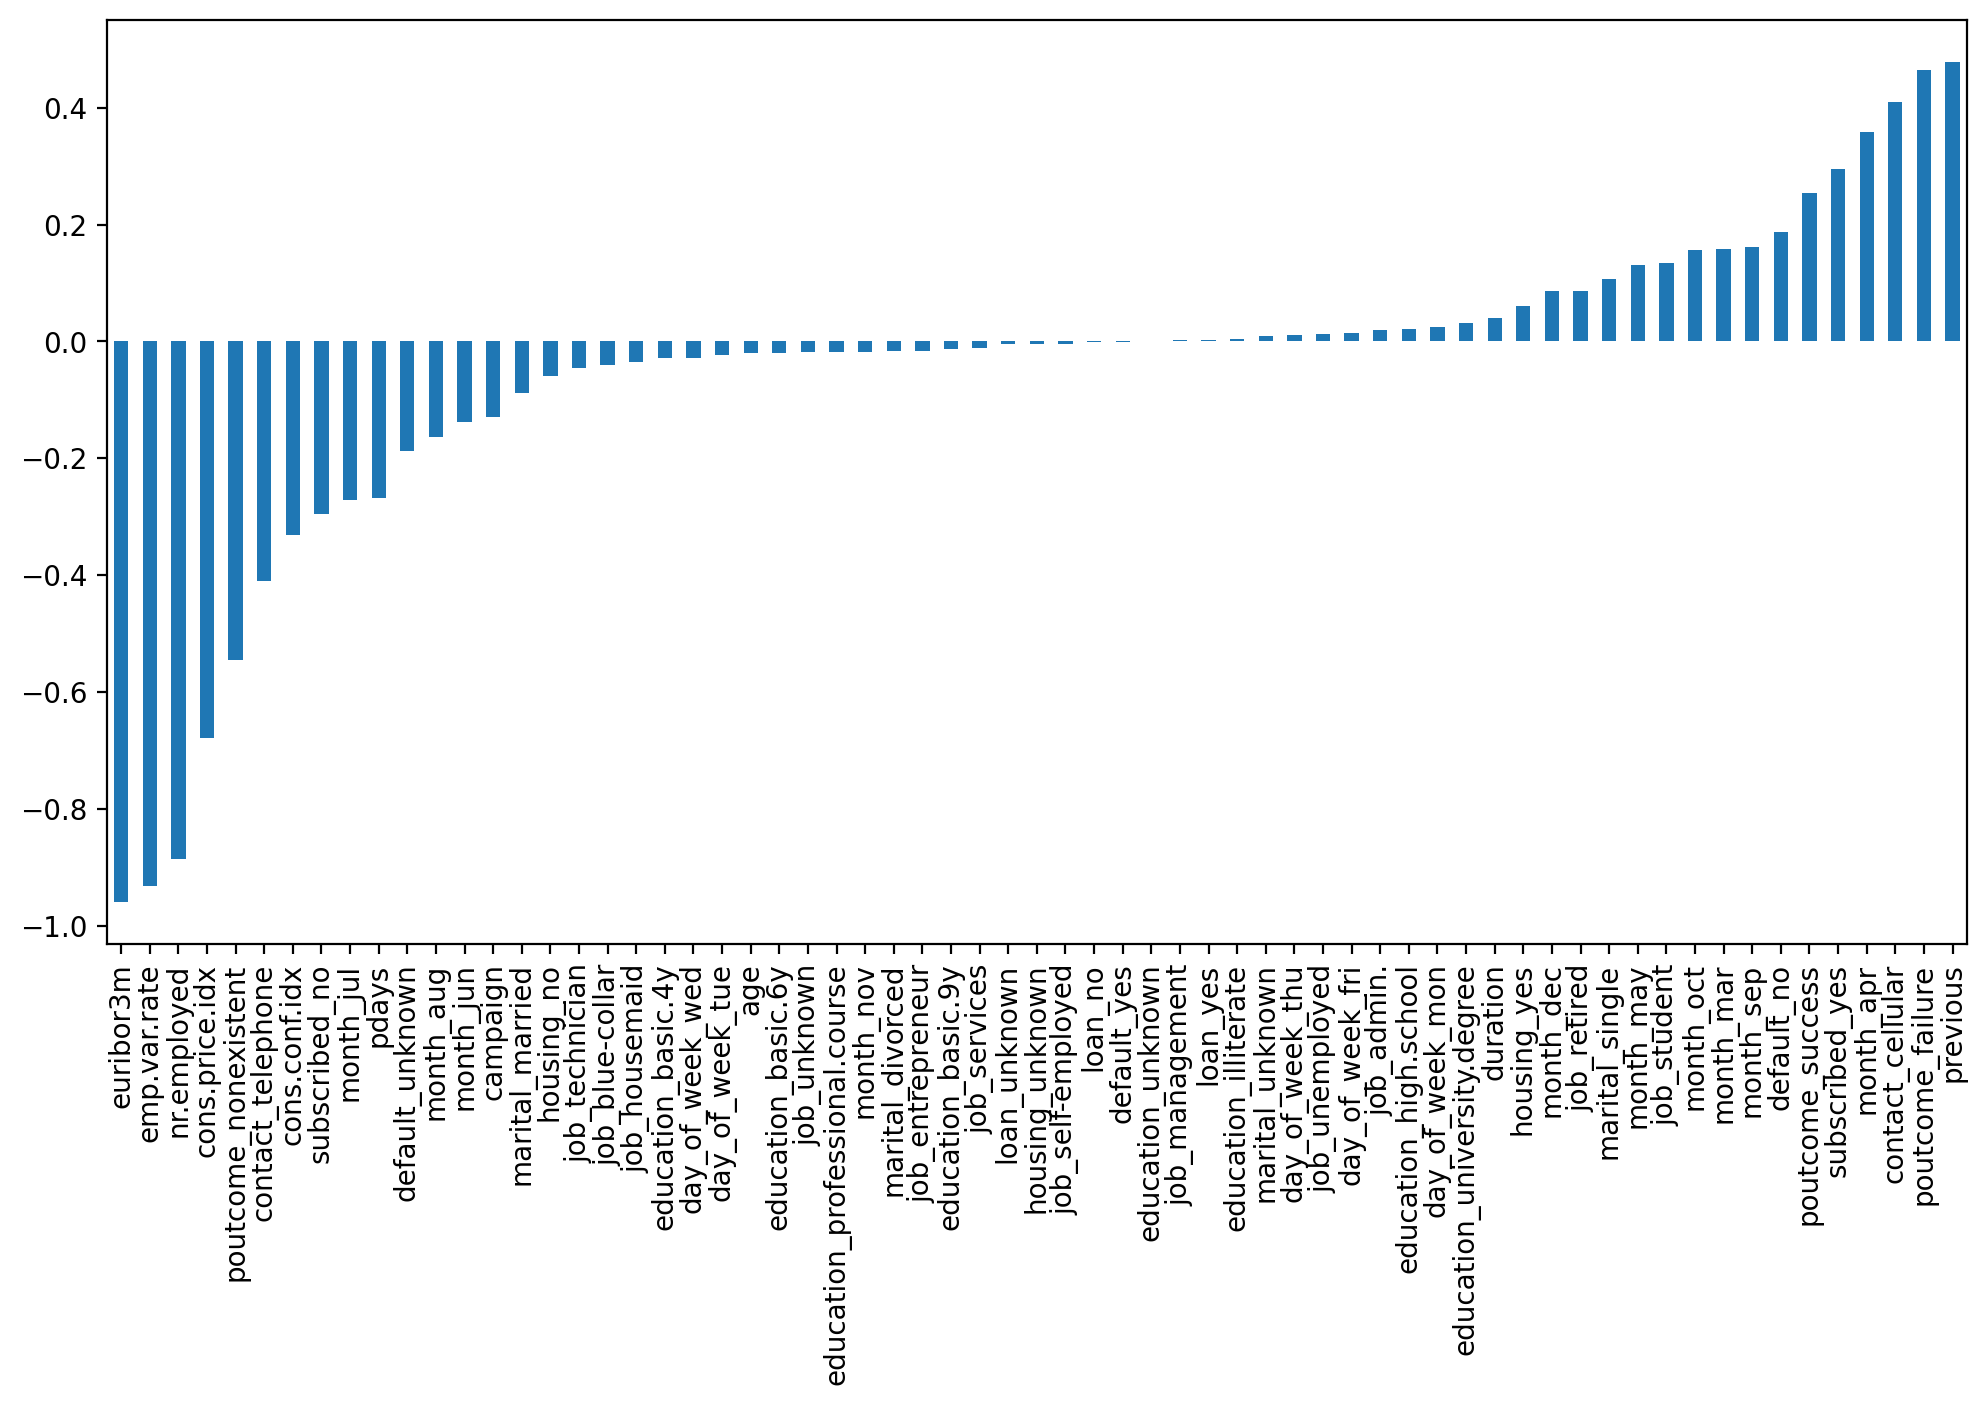

In [36]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Выбираем значение K

In [37]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    # Сумма квадратов расстояний от точек до ближайших центров кластеров
    # (SSD - Sum of squared distances) 
    ssd.append(model.inertia_)

c:\Users\shaps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shaps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shaps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shaps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shaps\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, ' Sum of Squared Distances')

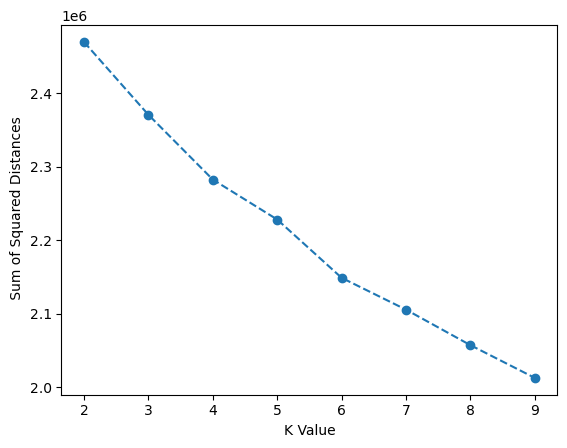

In [38]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Анализируем **уменьшение** метрики SSD

In [39]:
ssd

[2469792.3761762944,
 2370786.6400028146,
 2282648.239120697,
 2228290.5277043185,
 2149009.6107234955,
 2105687.765706814,
 2057398.235246208,
 2012869.2725128548]

In [40]:
# Изменение метрики SSD - текущее минус предыдущее значение!
pd.Series(ssd).diff()

0             NaN
1   -99005.736173
2   -88138.400882
3   -54357.711416
4   -79280.916981
5   -43321.845017
6   -48289.530461
7   -44528.962733
dtype: float64

<AxesSubplot:>

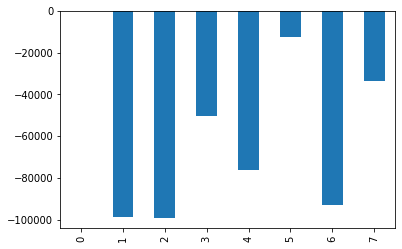

In [230]:
pd.Series(ssd).diff().plot(kind='bar')